[![Commits since latest release][gh-image]][gh-link]

[gh-link]: https://github.com/claudioperez/elle-0002/compare/v0.0.0...master
[gh-image]: https://img.shields.io/github/commits-since/claudioperez/elle-0002/v0.0.0?style=social

In [1]:
import anon
# anon.conf.config.update('jax_disable_jit', True)
anon.conf.config.update("jax_enable_x64", True)
import anon.atom as anp
import elle.sections
import elle.beam2d
import emme as em
geom_template = elle.beam2d.transform_no2(elle.beam2d.geom_no1)
beam_template = elle.beam2d.resp_no1

An `Assembler` is an object with an `.assemble()` and optionally a `.compose()` method

In [2]:
# Create a model Assembler
model = em.SkeletalModel(ndm=2,ndf=3)

# Define problem parameters
ColumnE  = model.param("ColumnE")
GirderE  = model.param("GirderE")
P1 = model.param("P1")

# Define model components
column_section = {"A": 576.0, "I": 27_648.0}
girder_section = {"A": 684.0, "I": 34_383.8}
basic_girder  = beam_template(**girder_section, E=GirderE)
basic_column  = beam_template(**column_section, E=ColumnE)

girder = geom_template(basic_girder)
column = geom_template(basic_column)

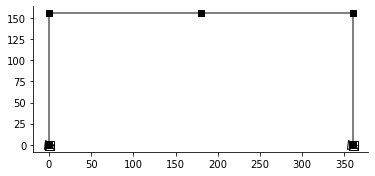

In [3]:
# Set up nodes
ft = 12
B, H = 30.*ft, 13.*ft
model.node("1",  0.,  0.)
model.node("2",  0.,  H )
model.node("3", B/2,  H )
model.node("4",  B ,  H )
model.node("5",  B ,  0.)

model.beam("a", "1", "2", **column_section, elem=column)
model.beam("b", "2", "3", **girder_section, elem=girder)
model.beam("c", "3", "4", **girder_section, elem=girder)
model.beam("d", "4", "5", **column_section, elem=column)

model.boun("1", [1,1,1])
model.boun("5", [1,1,1])

model.load("2",   P1, dof="x")
model.load("2", -2e3, dof="y")
model.load("4", -2e3, dof="y")

em.plot_structure(model);

In [4]:
f = model.compose()

In [5]:
f(3600.,3600.,2e3)

Traced<ShapedArray(float64[], weak_type=True)>with<DynamicJaxprTrace(level=0/1)> 27648.0 Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=0/1)>
Traced<ShapedArray(float64[], weak_type=True)>with<DynamicJaxprTrace(level=0/1)> 34383.8 Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=0/1)>
Traced<ShapedArray(float64[], weak_type=True)>with<DynamicJaxprTrace(level=0/1)> 34383.8 Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=0/1)>
Traced<ShapedArray(float64[], weak_type=True)>with<DynamicJaxprTrace(level=0/1)> 27648.0 Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=0/1)>


DeviceArray([[ 5.51162988],
             [-0.12559148],
             [-0.02953163],
             [ 5.43921196],
             [-0.19983019],
             [ 0.01428429],
             [ 5.36679404],
             [-0.17533444],
             [-0.02843458]], dtype=float64)

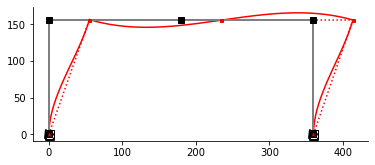

In [11]:
fig, ax = em.plot_displ(model, f(3600,3600,20e3),scale=1)

In [7]:
df = anon.diff.jacfwd(f, None, (0,1),squeeze=False)

In [8]:
df(29e6,29e6,20e3)

Traced<ShapedArray(float64[], weak_type=True)>with<JVPTrace(level=2/1)>
  with primal = Traced<ShapedArray(float64[], weak_type=True)>with<DynamicJaxprTrace(level=0/1)>
       tangent = Traced<ShapedArray(float64[])>with<BatchTrace(level=1/1)>
                   with val = Traced<ShapedArray(float64[2])>with<DynamicJaxprTrace(level=0/1)>
                        batch_dim = 0 27648.0 Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=0/1)>
Traced<ShapedArray(float64[], weak_type=True)>with<JVPTrace(level=2/1)>
  with primal = Traced<ShapedArray(float64[], weak_type=True)>with<DynamicJaxprTrace(level=0/1)>
       tangent = Traced<ShapedArray(float64[])>with<BatchTrace(level=1/1)>
                   with val = Traced<ShapedArray(float64[2])>with<DynamicJaxprTrace(level=0/1)>
                        batch_dim = 0 34383.8 Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=0/1)>
Traced<ShapedArray(float64[], weak_type=True)>with<JVPTrace(level=2/1)>
  with primal = Traced<Sha

/home/claudio/elle/numeric/elle/numeric/inverse.py:112: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


(DeviceArray([[-1.59375104e-10],
              [-6.71781567e-13],
              [ 2.93813049e-13],
              [-1.59355061e-10],
              [ 2.09187843e-13],
              [-1.38357094e-13],
              [-1.59335017e-10],
              [ 1.95993060e-12],
              [ 3.03477198e-13]], dtype=float64),
 DeviceArray([[-7.65567337e-11],
              [ 2.51202880e-13],
              [ 9.70323124e-13],
              [-7.34768423e-11],
              [ 2.54810932e-12],
              [-4.73098757e-13],
              [-7.03969509e-11],
              [-2.51202880e-13],
              [ 9.13698473e-13]], dtype=float64))